<a href="https://colab.research.google.com/github/charu11/Neural-Networks-from-Scratch/blob/NNFS/Neural_networks_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# ***Single Neuron***

In [ ]:
inputs = [1,2,3]
weights = [0.2, 0.3, 0.4]
bias = 2

output = (inputs[0] * weights[0] +
          inputs[1] * weights[1] +
          inputs[2] * weights[2] + bias)

print(output)

4.0


# ***Layer of neurons***

In [ ]:
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [
    # Neuron 1
    inputs[0] * weights1[0] +
    inputs[1] * weights1[1] +
    inputs[2] * weights1[2] +
    inputs[3] * weights1[3] + bias1 , 

    # Neuron 2
    inputs[0] * weights2[0] +
    inputs[1] * weights2[1] +
    inputs[2] * weights2[2] +
    inputs[3] * weights2[3] + bias2,

    inputs[0] * weights3[0] +
    inputs[1] * weights3[1] +
    inputs[2] * weights3[2] +
    inputs[3] * weights3[3] + bias3        
]


print(outputs)

[4.8, 1.21, 2.385]


*More Effcient way to calculate the output*

In [ ]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
# Output of current layer
outputs = []
# For each neuron

for neuron_weight, neuron_bias in zip(weights, biases):
  # Zeroed output of given neuron
  neuron_output = 0

  # For each input and weight to the neuron
  for n_input, weight in zip(inputs, neuron_weight):
    # Multiply this input by associated weight
    # and add to the neuron’s output variable
    neuron_output += n_input* weight

  # Add bias
  neuron_output += neuron_bias
  outputs.append(neuron_output)


print(outputs)


[4.8, 1.21, 2.385]


# ***Tensors, arrays, Vectors***

Tensors are closely-related to arrays. If you interchange tensor/array/matrix when it comes to
machine learning, people probably won’t give you too hard of a time. But there are subtle
differences, and they are primarily either the context or attributes of the tensor object. To
understand a tensor, let’s compare and describe some of the other data containers in Python
(things that hold data). Let’s start with a list. A Python list is defined by comma-separated
objects contained in brackets. So far, we’ve been using lists.


In [ ]:
list1 = [1,2,3,4]

list2 = [[1,5,6,2],
          [3,2,1,3]]

list3 =  [[[1,5,6,2],
          [3,2,1,3]],
          [[5,2,1,2],
          [6,4,8,4]],
          [[2,8,5,3],
          [1,1,9,4]]]


# above all the list can be an array because those are homologous( A list of lists is
#       homologous if each list along a dimension is identically long, and this must be true for each dimension).  


list4 = [[1,2,3,4],
         [5,6]]   # This can not be an array



***Matrix***

A matrix is pretty simple. It’s a rectangular array. It has columns and rows. It is two dimensional.
So a matrix can be an array (a 2D array). Can all arrays be matrices? No. An array can be far
more than just columns and rows, as it could have four dimensions, twenty dimensions, and so on.

In [ ]:
list_matrix_array = [[4,2],
                      [5,1],
                      [8,2]]

# the shape of this matrix is (3 * 2)




like in the list3, It has more than 2 dimenstions. 

The first level of this array contains 3 matrices: 




[[1,5,6,2],
[3,2,1,3]]

[[5,2,1,2],
[6,4,8,4]]

And

[[2,8,5,3],
[1,1,9,4]]


That’s what’s inside the most outer brackets and the size of this dimension is then 3. If we look at
the first matrix, we can see that it contains 2 lists — [1,5,6,2] and [3,2,1,3] so the size of
this dimension is 2 — while each list of this inner matrix includes 4 elements. These 4 elements
make up the 3rd and last dimension of this matrix since there are no more inner brackets.
Therefore, the shape of this array is (3, 2, 4) and it’s a 3-dimensional array, since the shape
contains 3 dimensions.

# Tensor

A tensor object is an object that can be represented as an array.
What this means is, as programmers, we can (and will) treat tensors as arrays in the context of
deep learning, and that’s really all the thought we have to put into it. Are all tensors just arrays?
No, but they are represented as arrays in our code, so, to us, they’re only arrays, and this is why
there’s so much argument and confusion.

# *Dot Product*

In [ ]:
a = [0,1,2]
b = [3,4,5]

dot_product = a[0] * b[0] + a[1] * b[1] + a[2] * b[2] 

print(dot_product)

14


# ***Single Neuron with Numpy***

In [ ]:
import numpy as np

In [ ]:
inputs = [1,2,3]
weights = [0.2, 0.3, 0.4]
bias = 2


outputs = np.dot(weights, inputs) + bias

print(outputs)

4.0


# ***A Layer of Neurons with Numpy***

In [ ]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]


layer_output = np.dot(weights, inputs) + biases

print(layer_output)

[4.8   1.21  2.385]


# A Batch of data

Often, neural networks expect to take in many samples at a time for two reasons. One reason
is that it’s faster to train in batches in parallel processing, and the other reason is that batches

help with generalization during training. If you fit (perform a step of a training process) on one
sample at a time, you’re highly likely to keep fitting to that individual sample, rather than
slowly producing general tweaks to weights and biases that fit the entire dataset. Fitting or
training in batches gives you a higher chance of making more meaningful changes to weights
and biases

# Matrix Product

The matrix product is an operation in which we have 2 matrices, and we are performing dot
products of all combinations of rows from the first matrix and the columns of the 2nd matrix,
resulting in a matrix of those atomic dot products:

***To perform a matrix product, the size of the second dimension of the left matrix must match the
size of the first dimension of the right matrix. For example, if the left matrix has a shape of (5, 4)
then the right matrix must match this 4 within the first shape value (4, 7). The shape of the
resulting array is always the first dimension of the left array and the second dimension of the right
array***

# **Transpose for the matrix product**

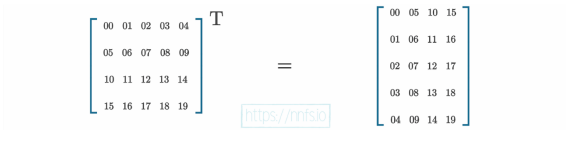

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Neural Networks from Scratch/transposition matrix.PNG')

This is an example for the matrix transpose.

In [ ]:
a = [1,2,3,4]
b = [5,6,7,6]

a = np.array([a])
b = np.array([b]).T

In [ ]:
np.dot(a, b)

array([[62]])

# **A Layers of Neurons & Batch of Data**

we need to the dot product of inputs and weights in order to get the product between those 2. so those have to be done using the matrices products. 
following example shows the input and weights lists. both are (3, 4) matrices,

In [ ]:
inputs = [[1.3,2.1,3.0,4.6], 
          [2.3,5.6,-1.9,4.8], 
          [-1.5, 2.7, 5.4, 3.3]]

weights = [[0.2, 0.4, 0.8, 1.0],
           [.7, -0.4, -0.1, 0.6], 
           [2.1, 1.1, 0.2, -1.1]]   

bias = [2.0, 1.0, 0.5]                  

To do the dot product on matrix row count of first matrix should be equal to the column count of the second matrix. but above the size is same which is (3,4)
this is why we need Transpose to get the multiplication done

In [ ]:
layer1_output = np.dot(inputs, np.array(weights).T) + bias

In [ ]:
layer1_output

array([[10.1 ,  3.53,  1.08],
       [ 7.98,  3.44,  5.83],
       [10.4 ,  0.31, -2.23]])

# **Adding Layers**

When adding the layers, most important factor to keep in mind is that, the new inputs should always be equal with the output of the previous layer

In [ ]:
# weights2 and bias2 is the weights of new hidden layer

weights2 = [[0.1, 0.2, 0.4],
           [.35, -0.2, -0.05], 
           [1.55, 0.55, 0.1]]   

bias2 = [1.0, 0.5, 0.25]  

In [ ]:
layer2_output = np.dot(output, np.array(weights2).T) + bias2

ALl Together now

In [ ]:
import numpy as np

inputs = [[1.3,2.1,3.0,4.6], 
          [2.3,5.6,-1.9,4.8], 
          [-1.5, 2.7, 5.4, 3.3]]

weights = [[0.2, 0.4, 0.8, 1.0],
           [.7, -0.4, -0.1, 0.6], 
           [2.1, 1.1, 0.2, -1.1]]   

bias = [2.0, 1.0, 0.5]    

weights2 = [[0.1, 0.2, 0.4],
           [.35, -0.2, -0.05], 
           [0.55, 0.55, 0.1]]   

bias2 = [1.0, 0.5, 0.25] 

layer1_output = np.dot(inputs, np.array(weights).T) + bias
layer2_output = np.dot(layer1_output, np.array(weights2).T) + bias2

print(layer2_output)

[[3.148  3.275  7.8545]
 [4.818  2.3135 7.114 ]
 [1.21   4.1895 5.9175]]


# Chapter 04

***Activation Functions***

In this chapter, we will tackle a few of the activation functions and discuss their roles. We use
different activation functions for different cases, and understanding how they work can help you
properly pick which of them is best for your task. The activation function is applied to the output
of a neuron (or layer of neurons), which modifies outputs. We use activation functions because if
the activation function itself is nonlinear, it allows for neural networks with usually two or more
hidden layers to map nonlinear functions. We’ll be showing how this works in this chapter.
In general, your neural network will have two types of activation functions. The first will be the
activation function used in hidden layers, and the second will be used in the output layer. Usually,
the activation function used for hidden neurons will be the same for all of them, but it doesn’t
have to.

***Step activation function***

Recall the purpose this activation function serves is to mimic a neuron “firing” or “not firing”
based on input information. The simplest version of this is a step function. In a single neuron, if
the weights · inputs + bias results in a value greater than 0, the neuron will fire and output a 1;
otherwise, it will output a 0.


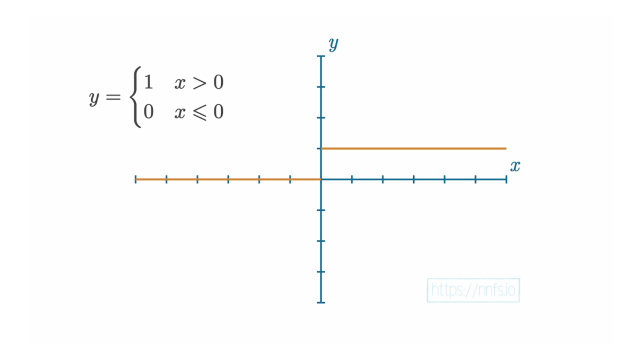

In [1]:
from IPython.display import Image
Image('/content/drive/MyDrive/Neural Networks from Scratch/step actiavtion function.PNG')

step activation function rarely using these days

***Linear activation function***

A linear function is simply the equation of a line. It will appear as a straight line when graphed,
where y=x and the output value equals the input.

This activation function is usually applied to the last layer’s output in the case of a regression
model — a model that outputs a scalar value instead of a classification

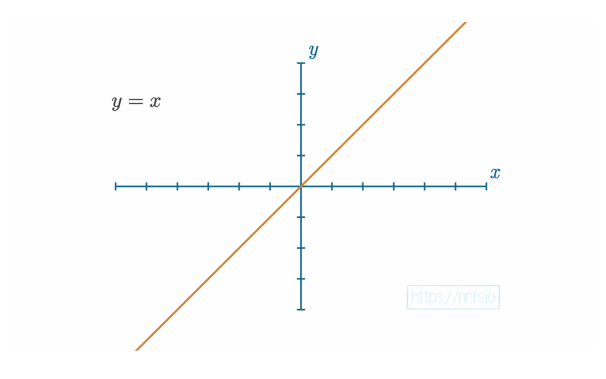

In [2]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/linear activation function.PNG')

***Sigmoid activation function***

it’s usually better to have a more granular approach
for the hidden neuron activation functions. In this case, we’re getting a value that can be
reversed to its original value; the returned value contains all the information from the input,
contrary to a function like the step function, where an input of 3 will output the same value as an
input of 300,000. The output from the Sigmoid function, being in the range of 0 to 1, also works
better with neural networks — especially compared to the range of the negative to the positive
infinity — and adds nonlinearity

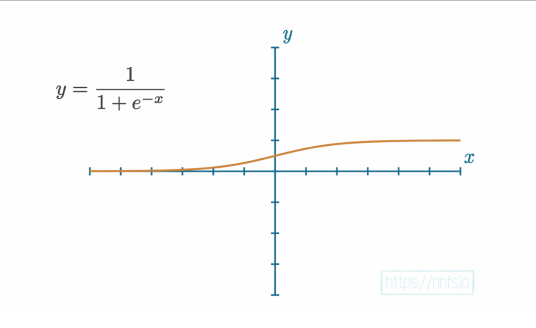

In [3]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/sigmoid.PNG')

Rectified linear activation function

The rectified linear activation function is simpler than the sigmoid. It’s quite literally y=x, clipped
at 0 from the negative side. If x is less than or equal to 0, then y is 0 — otherwise, y is equal to x.


This simple yet powerful activation function is the most widely used activation function at the
time of writing for various reasons — mainly speed and efficiency. While the sigmoid activation
function isn’t the most complicated, it’s still much more challenging to compute than the ReLU
activation function. The ReLU activation function is extremely close to being a linear activation
function while remaining nonlinear, due to that bend after 0(below images shows). This simple property is, however,
very effective.

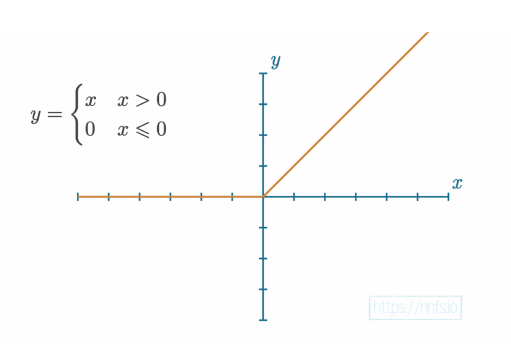

In [4]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/relu.PNG')

***Use of activation functions***

Now that we understand what activation functions represent, how some of them look, and what
they return, let’s discuss why we use activation functions in the first place. In most cases, for a
neural network to fit a nonlinear function, we need it to contain two or more hidden layers, and
we need those hidden layers to use a nonlinear activation function.
First off, what’s a nonlinear function? A nonlinear function cannot be represented well by a
straight line, such as a sine function:


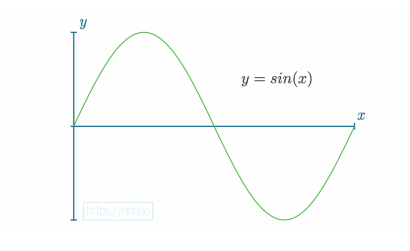

In [5]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/sinx.PNG')

While there are certainly problems in life that are linear in nature, for example, trying to figure
out the cost of some number of shirts, and we know the cost of an individual shirt, and that there
are no bulk discounts, then the equation to calculate the price of any number of those products is a
linear equation. Other problems in life are not so simple, like the price of a home. The number of
factors that come into play, such as size, location, time of year attempting to sell, number of
rooms, yard, neighborhood, and so on, makes the pricing of a home a nonlinear equation. Many of
the more interesting and hard problems of our time are nonlinear. The main attraction for neural
networks has to do with their ability to solve nonlinear problems. First, let’s consider a situation
where neurons have no activation function, which would be the same as having an activation
function of y=x. With this linear activation function in a neural network with 2 hidden layers of 8
neurons each, the result of training this model will look like:


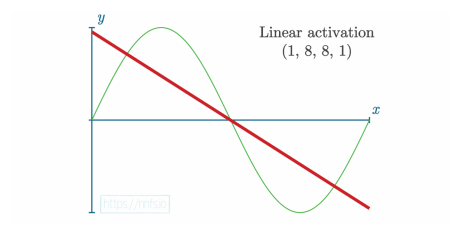

In [6]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/sinx linear.PNG')

When using the same 2 hidden layers of 8 neurons each with the rectified linear activation
function, we see the following result after training:


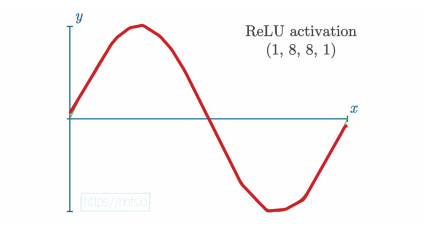

In [7]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/sinx relu.PNG')

***Linear activation in hidden layers***

Now that you can see that this is the case, we still should consider why this is the case. To begin,
let’s revisit the linear activation function of y=x, and let’s consider this on a singular neuron level.
Given values for weights and biases, what will the output be for a neuron with a y=x activation
function? Let’s look at some examples — first, let’s try to update the first weight with a positive
value:


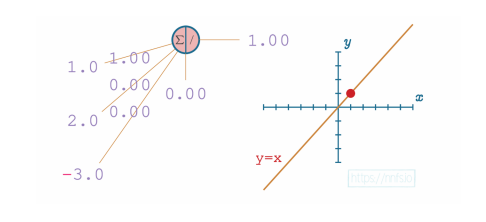

In [8]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/linear activation hidden layers.PNG')

In [10]:
#input * weight + bias
(1.0 * 1.00) + (2.0 * 0.00) + (3.0 * 0.00) + 0.00

1.0

after the calculation of our inputs, the value of x would be 1.0. since we are using linear function as our activation function the output of that activation fucnction is similar to the x value

No matter what we do with this neuron’s weights and biases, the output of this neuron will be
perfectly linear to y=x of the activation function. This linear nature will continue throughout the
entire network:

***ReLU Activation Function***